In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
# Importing the dataset
dataset = pd.read_csv('Instagramdata.csv')

In [4]:
# Exploring the dataset
dataset.head()

Users Number of Posts Number of Followers Number of Followings  \
0  User-1             486                 279                   19   
1  User-2             401               5,509                  342   
2  User-3             463                 453                  293   
3  User-4             154               1,231                1,477   
4  User-5             786               9,620                  421   

   Number of Likes for the Tenth Previous Post  \
0                                           15   
1                                          360   
2                                           65   
3                                           53   
4                                          623   

   Number of Likes for the Eleventh Previous Post  \
0                                              10   
1                                             440   
2                                              68   
3                                              22   
4                                            1299   

   Number of Likes for the Twelfth Previous Post  \
0                                             17   
1                                            428   
2                                            149   
3                                             35   
4                                            544   

   Number of Self-Presenting Posts from Nine Previous Posts  Gender  \
0                                                  0              m   
1                                                  0              f   
2                                                  4              f   
3                                                  3              m   
4                                                  0              m   

   Unnamed: 9  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Users                                                     1000 non-null   object 
 1   Number of Posts                                           1000 non-null   object 
 2   Number of Followers                                       1000 non-null   object 
 3   Number of Followings                                      1000 non-null   object 
 4   Number of Likes for the Tenth Previous Post               1000 non-null   int64  
 5   Number of Likes for the Eleventh Previous Post            1000 non-null   int64  
 6   Number of Likes for the Twelfth Previous Post             1000 non-null   int64  
 7   Number of Self-Presenting Posts from Nine Previous Posts  1000 non-null   int64  
 8    Gender            

In [6]:
dataset.describe()

Number of Likes for the Tenth Previous Post  \
count                                  1000.000000   
mean                                    114.621000   
std                                     197.677054   
min                                       0.000000   
25%                                      20.000000   
50%                                      47.500000   
75%                                     119.500000   
max                                    1620.000000   

       Number of Likes for the Eleventh Previous Post  \
count                                     1000.000000   
mean                                       112.477000   
std                                        192.674074   
min                                          0.000000   
25%                                         19.000000   
50%                                         51.000000   
75%                                        116.000000   
max                                       1956.000000   

       Number of Likes for the Twelfth Previous Post  \
count                                    1000.000000   
mean                                      114.923000   
std                                       202.001628   
min                                         0.000000   
25%                                        19.000000   
50%                                        51.000000   
75%                                       119.500000   
max                                      1806.000000   

       Number of Self-Presenting Posts from Nine Previous Posts  Unnamed: 9  
count                                        1000.000000                0.0  
mean                                            4.014000                NaN  
std                                             3.180239                NaN  
min                                             0.000000                NaN  
25%                                             1.000000                NaN  
50%                                             4.000000                NaN  
75%                                             7.000000                NaN  
max                                             9.000000                NaN

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

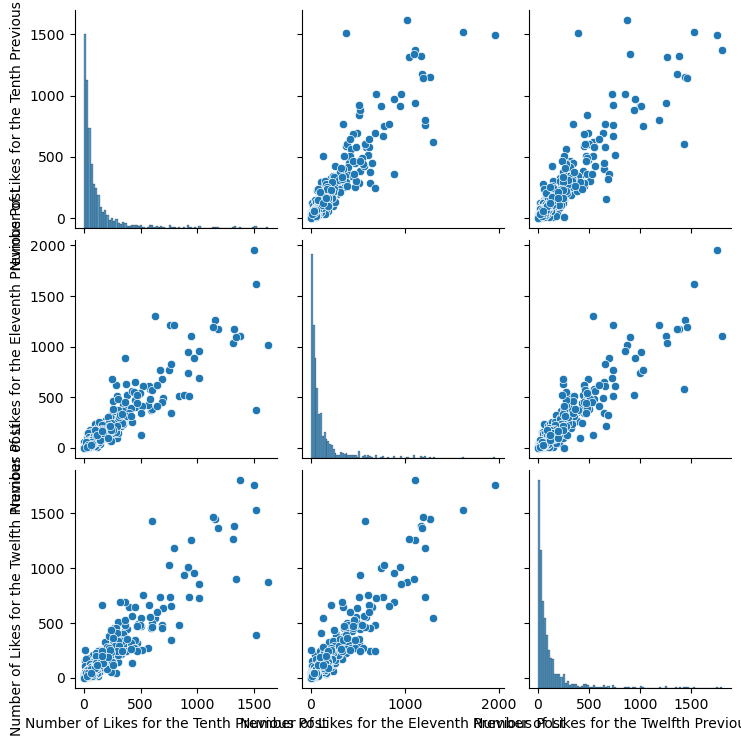

In [10]:
# Exploring the data by visualising the numerical columns using pairplot function

sns.pairplot(dataset.iloc[:, [2, 4, 5, 6]])

In [11]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
x = dataset.iloc[:, [4,5,6]].values
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

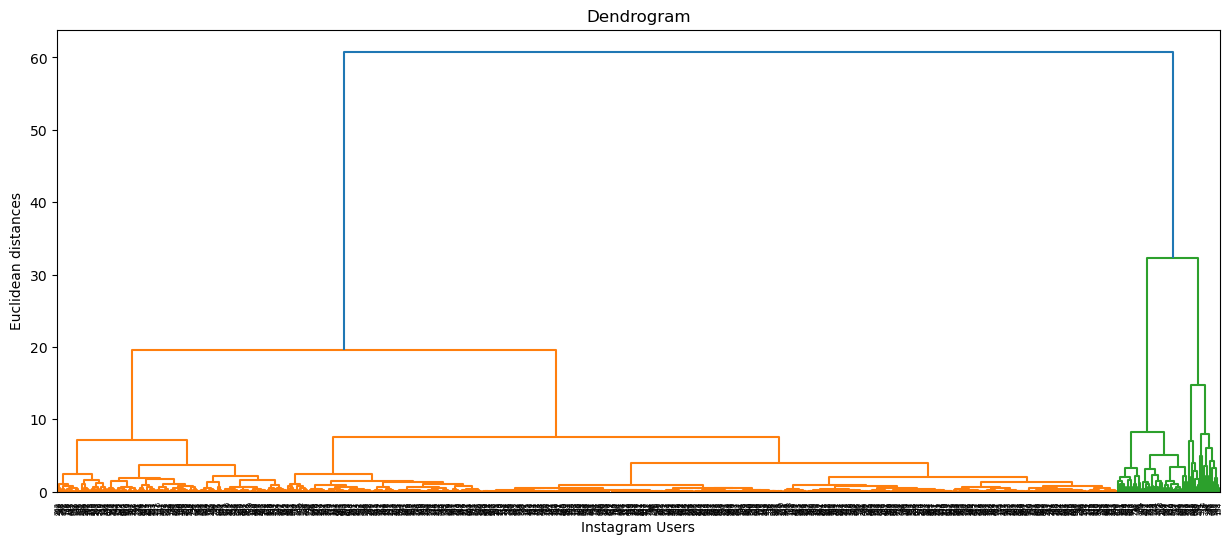

In [12]:
# Using Dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Instagram Users')
plt.ylabel('Euclidean distances')
plt.show()

In [13]:
# Fitting the Hierarchial Clustering to the dataset

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


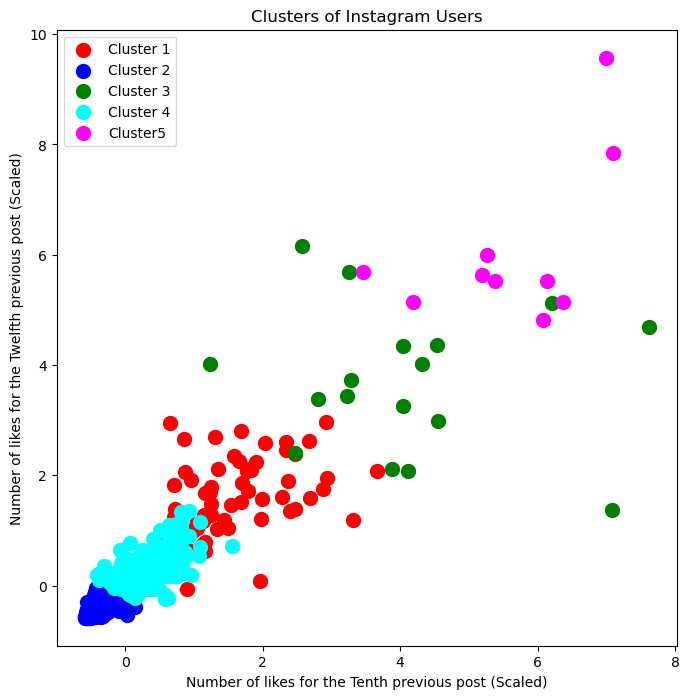

In [16]:
# Visualise the Clusters

plt.figure(figsize=(8,8))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.title('Clusters of Instagram Users')
plt.xlabel('Number of likes for the Tenth previous post (Scaled)')
plt.ylabel('Number of likes for the Twelfth previous post (Scaled)')
plt.legend()
plt.show()